In [1]:
import pandas as pd
import numpy as np
import os
air_quality = pd.read_csv(r"C:\Users\DELL\data.csv",encoding ='ANSI')

C:\Users\DELL\anaconda my version\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
air_quality

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,3/1/1990
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,4/1/1990
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,4/1/1990
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,4/1/1990
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,5/1/1990


In [3]:
air_quality.shape

(435742, 13)

In [4]:
air_quality.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                4
dtype: int64

In [8]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
state       435742 non-null object
location    435739 non-null object
type        430349 non-null object
so2         401096 non-null float64
no2         419509 non-null float64
rspm        395520 non-null float64
spm         198355 non-null float64
pm2_5       9314 non-null float64
date        435738 non-null object
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


In [9]:
air_quality.count()

state       435742
location    435739
type        430349
so2         401096
no2         419509
rspm        395520
spm         198355
pm2_5         9314
date        435738
dtype: int64

In [10]:
air_quality = air_quality.drop(columns = ['stn_code','agency','sampling_date','location_monitoring_station'])

KeyError: "['stn_code' 'agency' 'sampling_date' 'location_monitoring_station'] not found in axis"

In [11]:
air_quality['type']


0         Residential, Rural and other Areas
1                            Industrial Area
2         Residential, Rural and other Areas
3         Residential, Rural and other Areas
4                            Industrial Area
5         Residential, Rural and other Areas
6         Residential, Rural and other Areas
7                            Industrial Area
8         Residential, Rural and other Areas
9                            Industrial Area
10        Residential, Rural and other Areas
11        Residential, Rural and other Areas
12                           Industrial Area
13        Residential, Rural and other Areas
14        Residential, Rural and other Areas
15        Residential, Rural and other Areas
16                           Industrial Area
17        Residential, Rural and other Areas
18                           Industrial Area
19        Residential, Rural and other Areas
20        Residential, Rural and other Areas
21                           Industrial Area
22        

In [12]:
air_quality['type']=air_quality['type'].replace("Residential, Rural and other Areas","RRO")
air_quality['type']=air_quality['type'].replace("RIRUO","RRO")
air_quality['type']=air_quality['type'].replace("Industrial Area","IA")


In [ ]:
type('date')


In [14]:
air_quality['year'] = pd.DatetimeIndex(air_quality['date']).year

In [15]:
type('type')

str

In [16]:
#air_quality.isnull().sum()
mean_so2 = air_quality['so2'].mean()
air_quality['so2']=air_quality['so2'].replace(to_replace = np.nan, value = mean_so2)

mean_no2 = air_quality['no2'].mean()
air_quality['no2']=air_quality['no2'].replace(to_replace = np.nan, value = mean_no2)

mean_rspm = air_quality['rspm'].mean()
air_quality['rspm']=air_quality['rspm'].replace(to_replace = np.nan, value = mean_rspm)

mean_spm = air_quality['spm'].mean()
air_quality['spm']=air_quality['spm'].replace(to_replace = np.nan, value = mean_spm)

mean_pm2_5 = air_quality['pm2_5'].mean()
air_quality['pm2_5']=air_quality['pm2_5'].replace(to_replace = np.nan, value = mean_pm2_5)

air_quality['date'] = air_quality['date'].replace(to_replace = np.nan,value = "2/1/1990")


air_quality['year'] = air_quality['year'].replace(to_replace = np.nan,value = "1990")



<IPython.core.display.Javascript object>


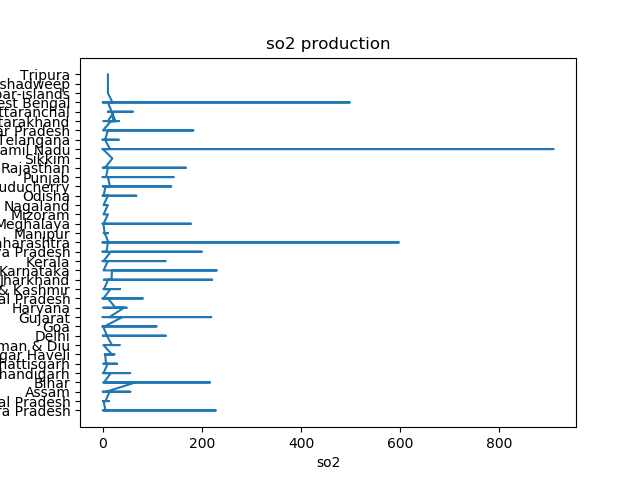

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook

x = air_quality['so2']
y = air_quality['state']

plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('so2') 
# naming the y axis 
plt.ylabel('state') 
  
# giving a title to my graph 
plt.title('so2 production') 
  
# function to show the plot 
plt.show() 

In [19]:
air_quality.isnull().sum()

state          0
location       3
type        5393
so2            0
no2            0
rspm           0
spm            0
pm2_5          0
date           0
year           0
dtype: int64

In [33]:
air_quality.to_csv(r'C:\Users\DELL\df_data.csv')

In [37]:
df_data = pd.read_csv(r"C:\Users\DELL\df_data.csv",encoding = 'ANSI')

In [38]:
df_data = df_data.set_index('year')

In [46]:
df_data = df_data.drop(columns = ['state','location','type','date'])

KeyError: "['state' 'location' 'type' 'date'] not found in axis"

<IPython.core.display.Javascript object>


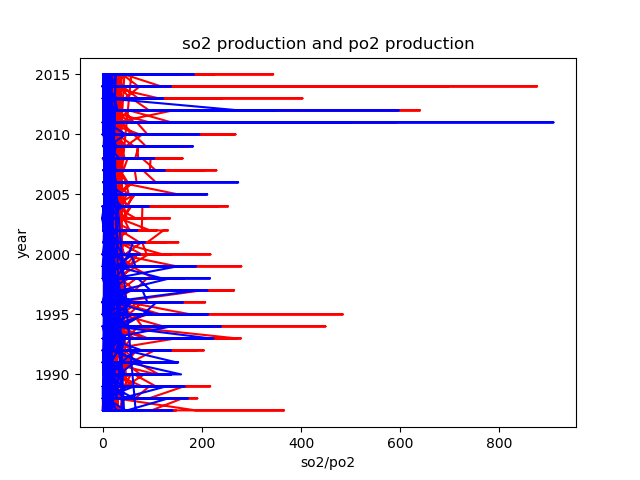

In [62]:
import matplotlib.pyplot as plt
%matplotlib notebook

y = df_data['so2']
z = df_data['no2']
x = df_data.index

plt.plot(df_data['no2'],df_data.index,color = 'red') 
plt.plot(df_data['so2'],df_data.index,color = 'blue')
  
# naming the x axis 
plt.xlabel('so2/po2') 
# naming the y axis 
plt.ylabel('year') 
  
# giving a title to my graph 
plt.title('so2 production and po2 production') 
  
# function to show the plot 
plt.show() 